In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('bank-copy.csv', sep=';')
test = pd.read_csv('bank.csv', sep=';')

# Data Exploration

In [3]:
display(train.head())
display(test.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 co

(None, None)

### Dividing Columns into Numeric Columns and Object Columns

In [5]:
obj_columns = []
int_columns = []
for i, x in enumerate(train.dtypes.tolist()):
    if x == 'object':
        obj_columns.append(train.columns[i])
    elif x == 'int64':
        int_columns.append(train.columns[i])

In [6]:
for x in obj_columns:
    print(f'Number of Unique Values in {x} column: ', train[x].nunique())

Number of Unique Values in job column:  12
Number of Unique Values in marital column:  3
Number of Unique Values in education column:  4
Number of Unique Values in default column:  2
Number of Unique Values in housing column:  2
Number of Unique Values in loan column:  2
Number of Unique Values in contact column:  3
Number of Unique Values in month column:  12
Number of Unique Values in poutcome column:  4
Number of Unique Values in y column:  2


### Encoding Plan

- One Hot Encoding : 'job, marital, contact, poutcome'
- Binary Encoding : 'loan, housing, default'
- Label Encoding: 'y'
- Ordinal Encoding: 'education'
- Sin/Cosine Encoding: 'month'

# Data Visualization

### Data Distribution

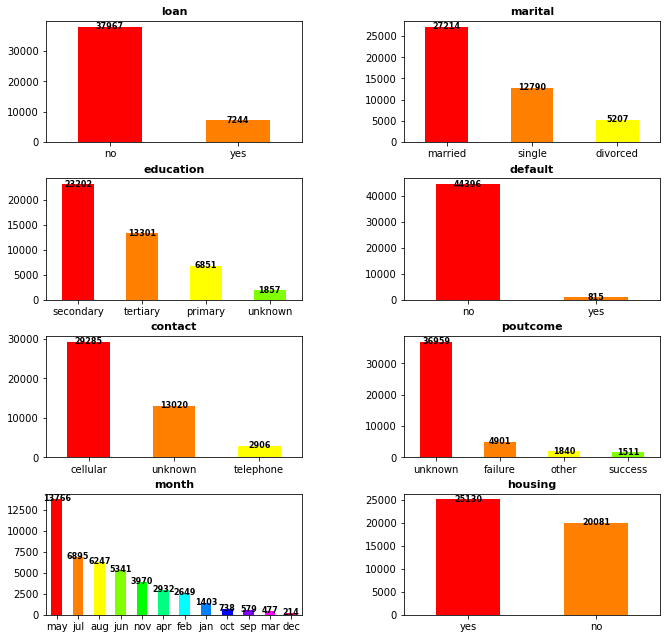

In [83]:
def graph(name, u):
    train[name].value_counts().plot(kind="bar",ax=u, color=colors)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.set_title(name, fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+100),
                   ha="center", va='center', fontsize=8, fontweight="bold")

###############################################################################
# EXPLORATORY DATA ANALYSIS

fig2, ax2 = plt.subplots(4,2, figsize=(11, 10), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#ff0000","#ff8000","#ffff00","#80ff00","#00ff00", "#00ff80", "#00ffff", "#0080ff", "#0000ff", "#8000ff", "#ff00ff", "#ff0080"]

graph("loan",ax2[0,0])
graph("marital",ax2[0,1])
graph("education",ax2[1,0])
graph("default",ax2[1,1])
graph("contact",ax2[2,0])
graph("poutcome",ax2[2,1])
graph("month",ax2[3,0])
graph("housing",ax2[3,1])
plt.rcParams['axes.axisbelow'] = True
plt.savefig("Data_Distribution.jpeg")

In [8]:
jobs = train['job'].unique().tolist()

In [9]:
labels1 = []
for x in jobs:
    labels1.append(x + '\n' + str(round(len(train[(train['job'] == x) & (train['y'] == 'yes')]) / len(train[train['job'] == x]) * 100, 2)) + '%')

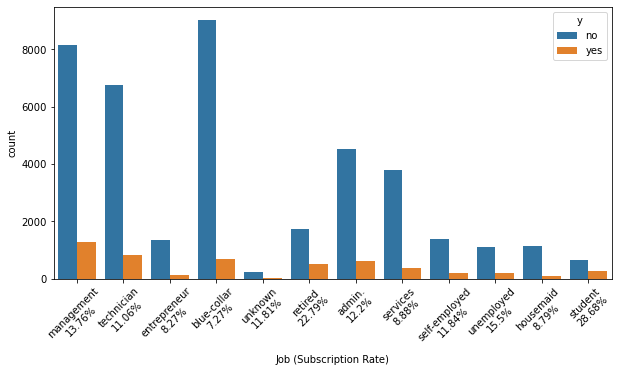

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['job'], hue=train['y'])
locs, label = plt.xticks()
new_xticks = labels1
_ = plt.xticks(locs, new_xticks, rotation=45) 
_ = plt.xlabel('Job (Subscription Rate)')
plt.savefig("Subscription_Rate_by_Job.jpeg")

# Data Preprocessing

In [11]:
c_train = train.copy()

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [13]:
o_encoder = OrdinalEncoder()
b_encoder = preprocessing.LabelBinarizer()
l_encoder = preprocessing.LabelEncoder()

In [14]:
X = c_train.drop(['y'], axis=1)
y = c_train['y']

### One Hot Encoding

In [15]:
oh_list = ['job', 'marital', 'contact', 'poutcome']

for a in oh_list:
    if a == 'contact':
        d = pd.get_dummies(X[a], prefix='ct')
        X = pd.concat([X,d], axis=1)
        del X[a]
    elif a == 'poutcome':
        d = pd.get_dummies(X[a], prefix='pc')
        X = pd.concat([X,d], axis=1)
        del X[a]
    else:
        d = pd.get_dummies(X[a], drop_first=True)
        X = pd.concat([X,d], axis=1)
        del X[a]
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,58,tertiary,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,5,may,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,secondary,no,2,yes,yes,5,may,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,5,may,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,unknown,no,1,no,no,5,may,198,1,...,1,0,1,0,0,1,0,0,0,1


### Ordinal Encoding

In [16]:
a = o_encoder.fit_transform(asarray(X['education']).reshape(-1,1))
a = a.reshape(45211,)
X['education'] = a
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,58,2.0,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,1.0,no,29,yes,no,5,may,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,1.0,no,2,yes,yes,5,may,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,3.0,no,1506,yes,no,5,may,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,3.0,no,1,no,no,5,may,198,1,...,1,0,1,0,0,1,0,0,0,1


### Binary Encoding

In [17]:
b_list = ['loan', 'housing', 'default']

for l in b_list:
    a = b_encoder.fit_transform(X[l])
    X[l] = a

X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,58,2.0,0,2143,1,0,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,1.0,0,29,1,0,5,may,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,1.0,0,2,1,1,5,may,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,3.0,0,1506,1,0,5,may,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,3.0,0,1,0,0,5,may,198,1,...,1,0,1,0,0,1,0,0,0,1


### Label Encoding

In [18]:
a = l_encoder.fit_transform(y)
y = a
y

array([0, 0, 0, ..., 1, 0, 0])

### Sin/Cosine Encoding (Month)

In [20]:
import math
X['month'] = X['month'].map({'jan':1,
               'feb':2,
               'mar':3,
               'apr':4,
               'may':5,
               'jun':6,
               'jul':7,
               'aug':8,
               'sep':9,
               'oct':10,
               'nov':11,
               'dec':12})
X['month'] = X['month'].apply(lambda x: math.sin(2*math.pi*x/12))

scale_col = ['age', 'balance', 'duration', 'day']

for l in scale_col:
    sc = StandardScaler()
    scaled_X = sc.fit_transform(asarray(X[l]).reshape(-1,1))
    X[l] = scaled_X.reshape(45211,)
X.head()


,age,education,default,balance,housing,loan,day,month,duration,campaign,...,unknown,married,single,ct_cellular,ct_telephone,ct_unknown,pc_failure,pc_other,pc_success,pc_unknown
0,1.606965,2.0,0,0.256419,1,0,-1.298476,0.5,0.011016,1,...,0,1,0,0,0,1,0,0,0,1
1,0.288529,1.0,0,-0.437895,1,0,-1.298476,0.5,-0.416127,1,...,0,0,1,0,0,1,0,0,0,1
2,-0.747384,1.0,0,-0.446762,1,1,-1.298476,0.5,-0.707361,1,...,0,1,0,0,0,1,0,0,0,1
3,0.571051,3.0,0,0.047205,1,0,-1.298476,0.5,-0.645231,1,...,0,1,0,0,0,1,0,0,0,1
4,-0.747384,3.0,0,-0.447091,0,0,-1.298476,0.5,-0.233620,1,...,1,0,1,0,0,1,0,0,0,1


# Machine Learning

In [21]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn import metrics

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [36]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = accuracy_score(pred1, y_test)
print(classification_report(pred1, y_test))
print(acc1)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     12739
           1       0.32      0.62      0.42       825

    accuracy                           0.90     13564
   macro avg       0.65      0.77      0.68     13564
weighted avg       0.93      0.90      0.91     13564

0.8950899439693306


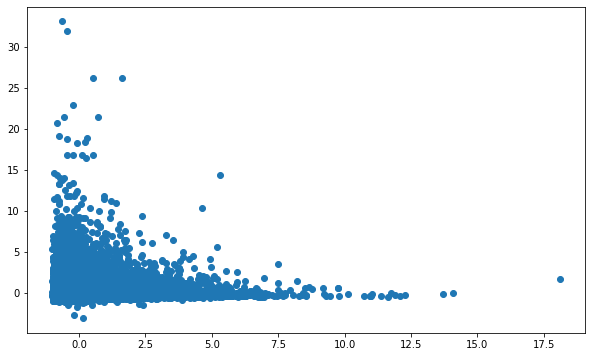

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(figsize = (10, 6))
colors={0:'red', 1:'green'}
plt.scatter(X['duration'], X['balance'])
plt.show()
plt.savefig("Linearity_of_Data.jpeg")

In [24]:
model2 = GaussianNB()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc2 = accuracy_score(pred2, y_test)
print(classification_report(pred2, y_test))
print(acc2)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10925
           1       0.53      0.33      0.41      2639

    accuracy                           0.81     13564
   macro avg       0.69      0.63      0.65     13564
weighted avg       0.79      0.81      0.80     13564

0.8131082276614569


In [52]:
from scipy.stats import shapiro
for i in int_columns:
    print(f'{i} {"Not Gaussian" if shapiro(X[i])[1]<0.05 else "Gaussian"}  {shapiro(X[i])}')

age Not Gaussian  ShapiroResult(statistic=0.9605379700660706, pvalue=0.0)
balance Not Gaussian  ShapiroResult(statistic=0.4571695923805237, pvalue=0.0)
day Not Gaussian  ShapiroResult(statistic=0.9594599008560181, pvalue=0.0)
duration Not Gaussian  ShapiroResult(statistic=0.7269977331161499, pvalue=0.0)
campaign Not Gaussian  ShapiroResult(statistic=0.5507382750511169, pvalue=0.0)
pdays Not Gaussian  ShapiroResult(statistic=0.47478705644607544, pvalue=0.0)
previous Not Gaussian  ShapiroResult(statistic=0.23559075593948364, pvalue=0.0)


In [25]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
acc3 = accuracy_score(pred3, y_test)
print(classification_report(pred3, y_test))
print(acc3)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     12663
           1       0.31      0.56      0.40       901

    accuracy                           0.89     13564
   macro avg       0.64      0.74      0.67     13564
weighted avg       0.92      0.89      0.90     13564

0.8886021822471247


In [26]:
model4= DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
acc4 = accuracy_score(pred4, y_test)
print(classification_report(pred4, y_test))
print(acc4)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     12477
           1       0.38      0.57      0.46      1087

    accuracy                           0.89     13564
   macro avg       0.67      0.75      0.70     13564
weighted avg       0.92      0.89      0.90     13564

0.8919935122382778


In [27]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
acc5 = accuracy_score(pred5, y_test)
print(classification_report(pred5, y_test))
print(acc5)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12632
           1       0.36      0.64      0.46       932

    accuracy                           0.90     13564
   macro avg       0.67      0.78      0.70     13564
weighted avg       0.93      0.90      0.91     13564

0.898849896785609


In [28]:
model6 = SVC()
model6.fit(X_train, y_train)
pred6 = model6.predict(X_test)
acc6 = accuracy_score(pred6, y_test)
print(classification_report(pred6, y_test))
print(acc6)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     13564
           1       0.00      0.00      0.00         0

    accuracy                           0.88     13564
   macro avg       0.50      0.44      0.47     13564
weighted avg       1.00      0.88      0.94     13564

0.879976408139192


In [78]:
model7 = XGBClassifier()
eval_set = [(X_train, y_train),(X_test, y_test)]
model7.fit(X_train, y_train, eval_metric=['error','logloss'], eval_set = eval_set)
pred7 = model7.predict(X_test)
acc7 = accuracy_score(pred7, y_test)
print(classification_report(pred7, y_test))
print(acc7)

[0]	validation_0-error:0.09078	validation_0-logloss:0.50755	validation_1-error:0.10484	validation_1-logloss:0.51299
[1]	validation_0-error:0.08971	validation_0-logloss:0.40520	validation_1-error:0.10373	validation_1-logloss:0.41466
[2]	validation_0-error:0.08737	validation_0-logloss:0.34036	validation_1-error:0.10196	validation_1-logloss:0.35348
[3]	validation_0-error:0.08614	validation_0-logloss:0.29768	validation_1-error:0.10226	validation_1-logloss:0.31421
[4]	validation_0-error:0.08579	validation_0-logloss:0.26832	validation_1-error:0.10226	validation_1-logloss:0.28778
[5]	validation_0-error:0.08557	validation_0-logloss:0.24801	validation_1-error:0.10144	validation_1-logloss:0.26966
[6]	validation_0-error:0.08399	validation_0-logloss:0.23225	validation_1-error:0.10130	validation_1-logloss:0.25576
[7]	validation_0-error:0.08367	validation_0-logloss:0.22076	validation_1-error:0.10174	validation_1-logloss:0.24557
[8]	validation_0-error:0.08314	validation_0-logloss:0.21267	validation_1

### XGBoost Evaluation

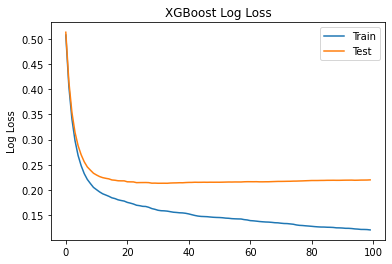

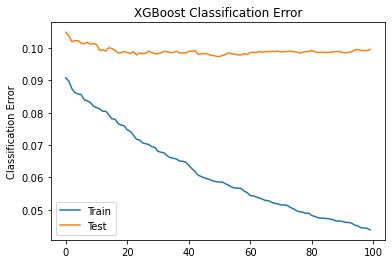

In [79]:
results = model7.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0,epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig("Log_Loss.jpeg")
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.savefig("Classification_error.jpeg")
plt.show()

# Feature Importance

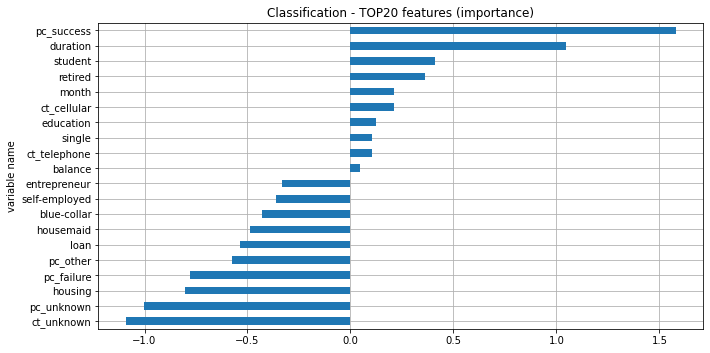

In [73]:
values = model1.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")
plt.savefig("Feature_importance.jpeg")

# Model Comparison Table

In [64]:
from pandas.plotting import table 

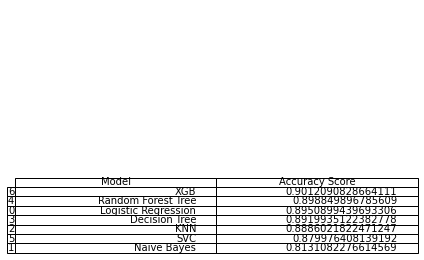

In [74]:
acc_table = pd.DataFrame({'Model': ['Logistic Regression',
                                   'Naive Bayes',
                                   'KNN',
                                   'Decision Tree',
                                   'Random Forest Tree',
                                   'SVC',
                                   'XGB'],
                         'Accuracy Score': [acc1,
                                           acc2,
                                           acc3,
                                           acc4,
                                           acc5,
                                           acc6,
                                           acc7]})
acc_table = acc_table.sort_values(by='Accuracy Score', ascending=False)
acc_table.style.background_gradient(cmap='Oranges')
 # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, acc_table)  # where df is your data frame
plt.tight_layout()
plt.savefig('accuracy_table.jpeg')

# ROC Curve of the Best Model

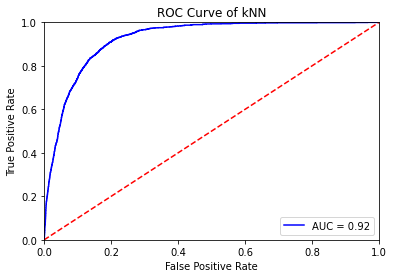

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = model7.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
newName = "ROC_Curve_KNN"
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.savefig("ROC_Curve_KNN.jpeg")
plt.show()